In [1]:
import logging
import warnings

logging.disable(logging.CRITICAL)
warnings.filterwarnings("ignore")

# Exploratory analysis with modality

Generating rapid and sufficiently deep exploratory analyses of complex datasets is an important part of the analysis workflow. Here we demonstrate how [```modality```](https://modality-docs.biomodal.com/index.html) enables such analysis with a few key examples.

## Load data

For the purposes of this demo we can use a duet +modC dataset of Genome in a bottle (GIAB) samples. These data are publicly available and can be loaded using the [```load_biomodal_dataset()```](https://modality-docs.biomodal.com/modality.html#modality.datasets.load_biomodal_dataset) function from the ```modality.datasets``` module. This will pull the dataset and load it in to our session as a [```ContigDataset```](https://modality-docs.biomodal.com/modality.html#module-modality.contig_dataset) object.

In [2]:
from modality.datasets import load_biomodal_dataset

In [3]:
ds = load_biomodal_dataset("giab")
ds

ContigDataset(data_vars=Data variables:
    Protocol Version                (sample_id) object '5-Letter v2.4' ... '5...
    family                          (sample_id) object 'Utah' ... 'Han Chinese'
    family_status                   (sample_id) object 'Singleton' ... 'Mother'
    num_c                           (pos, sample_id) uint16 dask.array<chunksize=(100000, 7), meta=np.ndarray>
    num_modc                        (pos, sample_id) uint16 dask.array<chunksize=(100000, 7), meta=np.ndarray>
    num_other                       (pos, sample_id) uint16 dask.array<chunksize=(100000, 7), meta=np.ndarray>
    num_total                       (pos, sample_id) uint16 dask.array<chunksize=(100000, 7), meta=np.ndarray>
    num_total_c                     (pos, sample_id) uint16 dask.array<chunksize=(100000, 7), meta=np.ndarray>
    sex                             (sample_id) object 'Female' ... 'Female'
    tech_replicate_number           (sample_id) int64 1 1 1 1 1 1 ... 2 2 2 2 2
    Input DNA Quantity (ng/sample)  (sample_id) int64 80 80 80 80 ... 80 80 80, coords=Coordinates:
    NA_id         (sample_id) object 'NA12878' 'NA24385' ... 'NA24694' 'NA24695'
    contig        (pos) <U5 dask.array<chunksize=(100000,), meta=np.ndarray>
    giab_id       (sample_id) object 'HG001' 'HG002' 'HG003' ... 'HG006' 'HG007'
    group         (sample_id) <U22 'CEG1530-EL01-A1200-001' ... 'CEG1532-EL01...
    ref_position  (pos) int64 dask.array<chunksize=(100000,), meta=np.ndarray>
  * sample_id     (sample_id) <U22 'CEG1530-EL01-A1200-001' ... 'CEG1532-EL01...
    strand        (pos) <U2 dask.array<chunksize=(100000,), meta=np.ndarray>, attrs={'context': 'CG', 'context_sampling': 1.0, 'contigs': ['chr1', 'chr2', 'chr3', 'chr4', 'chr5', 'chr6', 'chr7', 'chr8', 'chr9', 'chr10', 'chr11', 'chr12', 'chr13', 'chr14', 'chr15', 'chr16', 'chr17', 'chr18', 'chr19', 'chr20', 'chr21', 'chr22', 'chrX', 'chrY', 'chrM'], 'coordinate_basis': 0, 'description': 'A +modC dataset of human Genome in a bottle (GIAB) samples.\nThese data were generated by biomodal using a commercial kit.\n\nEach of the seven GIAB samples were sequenced on a single lane of a NovaSeq S4 flowcell.\nTwo technical replicates are available for each sample.', 'fasta_path': 'GRCh38Decoy-ss-ctrls-v23.fa.gz', 'input_path': ['CEG1530-EL01-A1200-001.genome.GRCh38Decoy.dedup.duet-modC.CG_quant.tsv.gz', 'CEG1530-EL01-A1200-004.genome.GRCh38Decoy.dedup.duet-modC.CG_quant.tsv.gz', 'CEG1530-EL01-A1200-007.genome.GRCh38Decoy.dedup.duet-modC.CG_quant.tsv.gz', 'CEG1530-EL01-A1200-010.genome.GRCh38Decoy.dedup.duet-modC.CG_quant.tsv.gz', 'CEG1530-EL01-A1200-013.genome.GRCh38Decoy.dedup.duet-modC.CG_quant.tsv.gz', 'CEG1530-EL01-A1200-016.genome.GRCh38Decoy.dedup.duet-modC.CG_quant.tsv.gz', 'CEG1530-EL01-A1200-019.genome.GRCh38Decoy.dedup.duet-modC.CG_quant.tsv.gz', 'CEG1532-EL01-A1200-002.genome.GRCh38Decoy.dedup.duet-modC.CG_quant.tsv.gz', 'CEG1532-EL01-A1200-005.genome.GRCh38Decoy.dedup.duet-modC.CG_quant.tsv.gz', 'CEG1532-EL01-A1200-008.genome.GRCh38Decoy.dedup.duet-modC.CG_quant.tsv.gz', 'CEG1532-EL01-A1200-011.genome.GRCh38Decoy.dedup.duet-modC.CG_quant.tsv.gz', 'CEG1532-EL01-A1200-015.genome.GRCh38Decoy.dedup.duet-modC.CG_quant.tsv.gz', 'CEG1532-EL01-A1200-017.genome.GRCh38Decoy.dedup.duet-modC.CG_quant.tsv.gz', 'CEG1532-EL01-A1200-020.genome.GRCh38Decoy.dedup.duet-modC.CG_quant.tsv.gz'], 'quant_type': 'quant5L', 'ref_name': 'GRCh38Decoy', 'sample_ids': ['CEG1530-EL01-A1200-001', 'CEG1530-EL01-A1200-004', 'CEG1530-EL01-A1200-007', 'CEG1530-EL01-A1200-010', 'CEG1530-EL01-A1200-013', 'CEG1530-EL01-A1200-016', 'CEG1530-EL01-A1200-019', 'CEG1532-EL01-A1200-002', 'CEG1532-EL01-A1200-005', 'CEG1532-EL01-A1200-008', 'CEG1532-EL01-A1200-011', 'CEG1532-EL01-A1200-015', 'CEG1532-EL01-A1200-017', 'CEG1532-EL01-A1200-020'], 'slice_chr1': slice(0, 4750318, 1), 'slice_chr10': slice(29992404, 32770360, 1), 'slice_chr11': slice(32770360, 35436588, 1), 'slice_chr12': slice(35436588, 38068524, 1), 'slice_chr13': s

This is the [```ContigDataset```](https://modality-docs.biomodal.com/modality.html#module-modality.contig_dataset), the main `modality` object, which is a multi-dimensional array following the [```xarray.Dataset```](https://docs.xarray.dev/en/stable/generated/xarray.Dataset.html) format. The two dimensions here are position and sample. For each of the 7 GIAB samples, we have two technical replicates, so 14 samples in total.

## An initial investiagtion of a dataset
A common goal for initial exploratory anlysis for a set of samples is to understand how they relate to each other. In terms of initial quality control (QC) this can help one indentify any potential issues, such as sample-swaps, very early in the analysis process. It can also give us some initial understanding of the underlying biology and help shape dowstream investigation. Below we go through a few examples of how ```modality``` can be used for these kind of initial investiagtions.

The functionality shown here can be used genome-wide but for brevity we will subset our dataset to a single chromosome. We can use the slice functionality of the [```ContigDataset```]("https://coda-docs.biomodal.com/coda.html#module-coda.contig_dataset") to extract a single chromosome view of the data and work with this downstream. 

In [4]:
ds = ds["chr2"]

### Pearson correlation across samples

One such primary analysis is to calculate the pearson correlation coefficients between pairs of samples in the dataset. This helps to summarise similarity between samples and can also flag potential issues, such as duplicated samples. This can be efficiently done using the ```compute_pearson_matrix``` method of the [```ContigDataset```](https://modality-docs.biomodal.com/modality.html#module-modality.contig_dataset). This method calculates methylation fractions between `numerator` and `denominator` arguments and then calculates the pearson correlation coefficients across the captured genomic range (in this case chromosome 2) between each pair of samples and returns the resulting matrix. This method can be used as is, or one can use the sister method: ```plot_pearson_matrix()```, which uses ```compute_pearson_matrix``` internally but returns a [```seaborn.heatmap```](https://seaborn.pydata.org/generated/seaborn.heatmap.html) visualisation of the result.

In [5]:
pearson_matrix = ds.compute_pearson_matrix(
    numerator="num_modc",
    denominator="num_total_c",
    min_coverage=15,
)

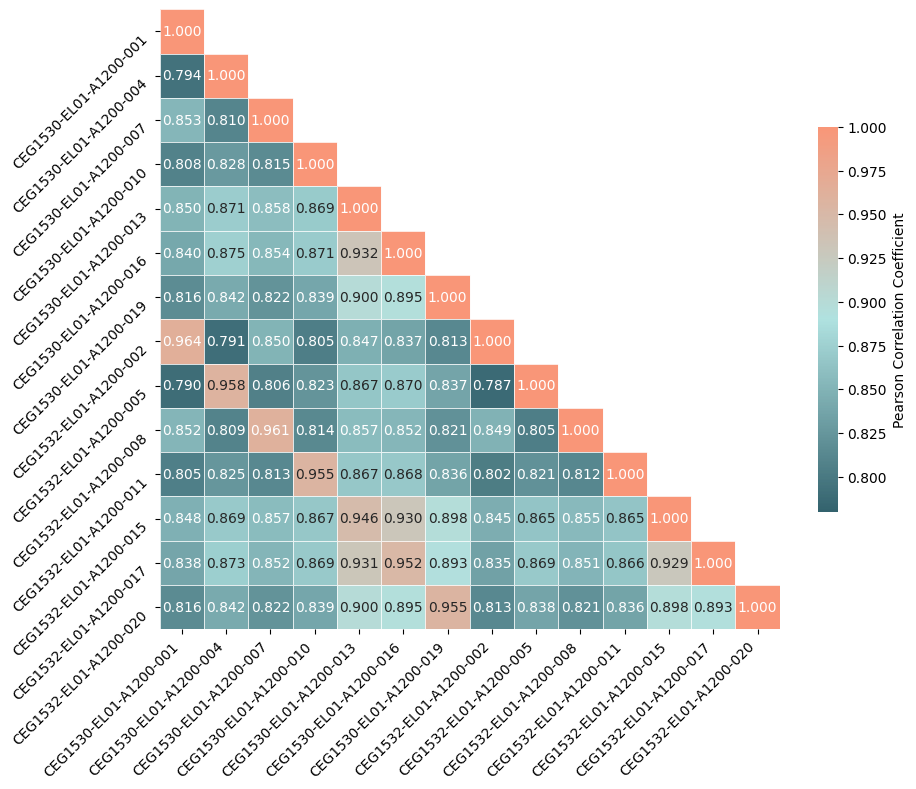

In [6]:
fig, axes = ds.plot_pearson_matrix(
    numerator="num_modc",
    denominator="num_total_c",
    min_coverage=15,
)

### PCA analysis
We may also wish to perfom a principal components analysis to help us understand the structure of the dataset. Here we can make use of the [```modality.pca```](https://modality-docs.biomodal.com/modality.html#modality-pca-module) module.

In [7]:
from modality.pca import run_pca, plot_pca_scree, plot_pca_scatter

We first calculate methylation fractions across the dataset, using the ```assign_fractions``` method of the [```ContigDataset```](https://modality-docs.biomodal.com/modality.html#module-modality.contig_dataset), so we can then use a methylation fraction feature for our pca analysis

In [8]:
ds.assign_fractions(
    numerators="num_modc",
    denominator="num_total_c",
    min_coverage=15,
    inplace=True,
)

In [9]:
pca_object, transformed_data = run_pca(
    input_array=ds.frac_modc,
    n_components=2,
)

You can quickly generate a scree plot to visualise the variance explained by each principal component:

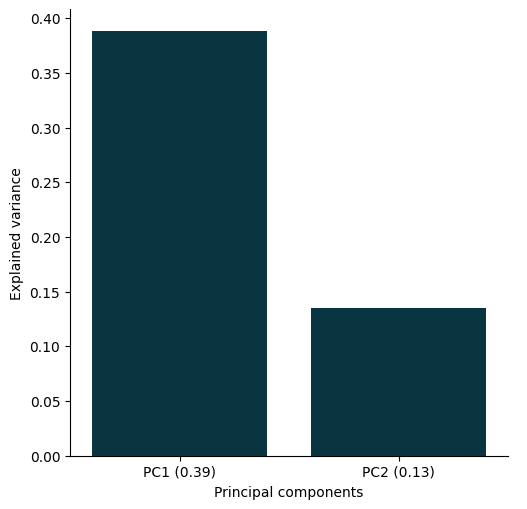

In [10]:
plot_pca_scree(
    pca_object=pca_object,
)

You can also generate a scatter plot to show how the samples are structured along any two principal components. For example, to check that technical replicates group as expected with their coupled samples.

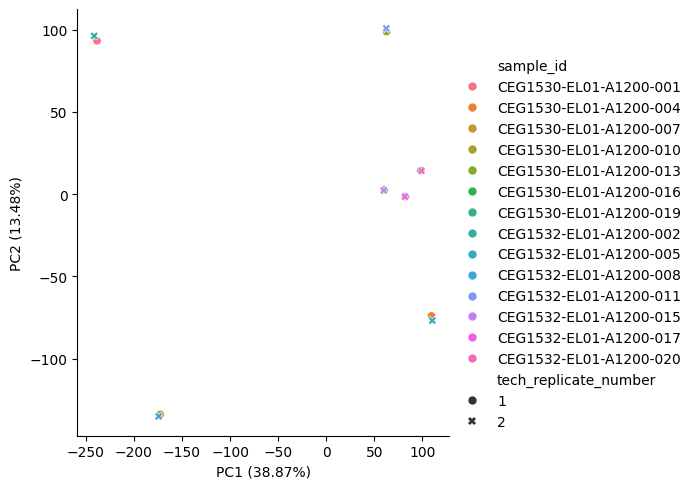

In [11]:
plot_pca_scatter(
    pca_object=pca_object,
    pca_result=transformed_data,
    hue=ds.sample_id,
    style=ds.tech_replicate_number,
)

### Restricting the dataset to a single trio

Here we show how to only select part of the dataset. We focus on the GIAB Han Chinese Trio
- HG005 is the son
- HG006 is the father
- HG007 is the mother

Each member of the trio has two replicates, so we will also sum over the replicates to gain some coverage.

In [12]:
from modality.contig_dataset import ContigDataset

In [13]:
# Filter to Han Chinese trio
ds_trio = ds.where(ds.family == "Han Chinese", drop=True)

# Sum the counts for each trio
ds_trio = ds_trio.groupby("giab_id").sum().transpose()

# Rename the index to sample_id for compatibility with the ContigDataset
ds_trio = ds_trio.rename({"giab_id": "sample_id"})
ds_trio = ContigDataset(ds_trio)

ds_trio.assign_fractions(
    numerators="num_modc",
    denominator="num_total_c",
    min_coverage=15,
    inplace=True,
)

ds_trio

ContigDataset(data_vars=Data variables:
    num_c                           (pos, sample_id) int64 dask.array<chunksize=(49682, 1), meta=np.ndarray>
    num_modc                        (pos, sample_id) int64 dask.array<chunksize=(49682, 1), meta=np.ndarray>
    num_other                       (pos, sample_id) int64 dask.array<chunksize=(49682, 1), meta=np.ndarray>
    num_total                       (pos, sample_id) int64 dask.array<chunksize=(49682, 1), meta=np.ndarray>
    num_total_c                     (pos, sample_id) int64 dask.array<chunksize=(49682, 1), meta=np.ndarray>
    tech_replicate_number           (sample_id) int64 3 3 3
    Input DNA Quantity (ng/sample)  (sample_id) int64 160 160 160
    frac_modc                       (pos, sample_id) float64 dask.array<chunksize=(49682, 1), meta=np.ndarray>, coords=Coordinates:
    contig        (pos) <U5 dask.array<chunksize=(49682,), meta=np.ndarray>
    ref_position  (pos) int64 dask.array<chunksize=(49682,), meta=np.ndarray>
    strand        (pos) <U2 dask.array<chunksize=(49682,), meta=np.ndarray>
  * sample_id     (sample_id) object 'HG005' 'HG006' 'HG007'
    group         (sample_id) object 'HG005' 'HG006' 'HG007', attrs={'context': 'CG', 'context_sampling': 1.0, 'contigs': ['chr2'], 'coordinate_basis': 0, 'description': 'A +modC dataset of human Genome in a bottle (GIAB) samples.\nThese data were generated by biomodal using a commercial kit.\n\nEach of the seven GIAB samples were sequenced on a single lane of a NovaSeq S4 flowcell.\nTwo technical replicates are available for each sample.', 'fasta_path': 'GRCh38Decoy-ss-ctrls-v23.fa.gz', 'input_path': ['CEG1530-EL01-A1200-001.genome.GRCh38Decoy.dedup.duet-modC.CG_quant.tsv.gz', 'CEG1530-EL01-A1200-004.genome.GRCh38Decoy.dedup.duet-modC.CG_quant.tsv.gz', 'CEG1530-EL01-A1200-007.genome.GRCh38Decoy.dedup.duet-modC.CG_quant.tsv.gz', 'CEG1530-EL01-A1200-010.genome.GRCh38Decoy.dedup.duet-modC.CG_quant.tsv.gz', 'CEG1530-EL01-A1200-013.genome.GRCh38Decoy.dedup.duet-modC.CG_quant.tsv.gz', 'CEG1530-EL01-A1200-016.genome.GRCh38Decoy.dedup.duet-modC.CG_quant.tsv.gz', 'CEG1530-EL01-A1200-019.genome.GRCh38Decoy.dedup.duet-modC.CG_quant.tsv.gz', 'CEG1532-EL01-A1200-002.genome.GRCh38Decoy.dedup.duet-modC.CG_quant.tsv.gz', 'CEG1532-EL01-A1200-005.genome.GRCh38Decoy.dedup.duet-modC.CG_quant.tsv.gz', 'CEG1532-EL01-A1200-008.genome.GRCh38Decoy.dedup.duet-modC.CG_quant.tsv.gz', 'CEG1532-EL01-A1200-011.genome.GRCh38Decoy.dedup.duet-modC.CG_quant.tsv.gz', 'CEG1532-EL01-A1200-015.genome.GRCh38Decoy.dedup.duet-modC.CG_quant.tsv.gz', 'CEG1532-EL01-A1200-017.genome.GRCh38Decoy.dedup.duet-modC.CG_quant.tsv.gz', 'CEG1532-EL01-A1200-020.genome.GRCh38Decoy.dedup.duet-modC.CG_quant.tsv.gz'], 'quant_type': 'quant5L', 'ref_name': 'GRCh38Decoy', 'sample_ids': ['CEG1530-EL01-A1200-001', 'CEG1530-EL01-A1200-004', 'CEG1530-EL01-A1200-007', 'CEG1530-EL01-A1200-010', 'CEG1530-EL01-A1200-013', 'CEG1530-EL01-A1200-016', 'CEG1530-EL01-A1200-019', 'CEG1532-EL01-A1200-002', 'CEG1532-EL01-A1200-005', 'CEG1532-EL01-A1200-008', 'CEG1532-EL01-A1200-011', 'CEG1532-EL01-A1200-015', 'CEG1532-EL01-A1200-017', 'CEG1532-EL01-A1200-020'], 'slice_chr2': slice(0, 4385340, 1), 'frac_denominator': 'num_total_c', 'frac_min_coverage': 15})

### Heatmap of methylation fraction between samples

We can get a more nuanced view of the correaltion between samples by plotting a heatmap of methylation fractions between pairs of samples using the ```plot_correlation_heatmaps()``` method of the [```ContigDataset```](https://modality-docs.biomodal.com/modality.html#module-modality.contig_dataset).

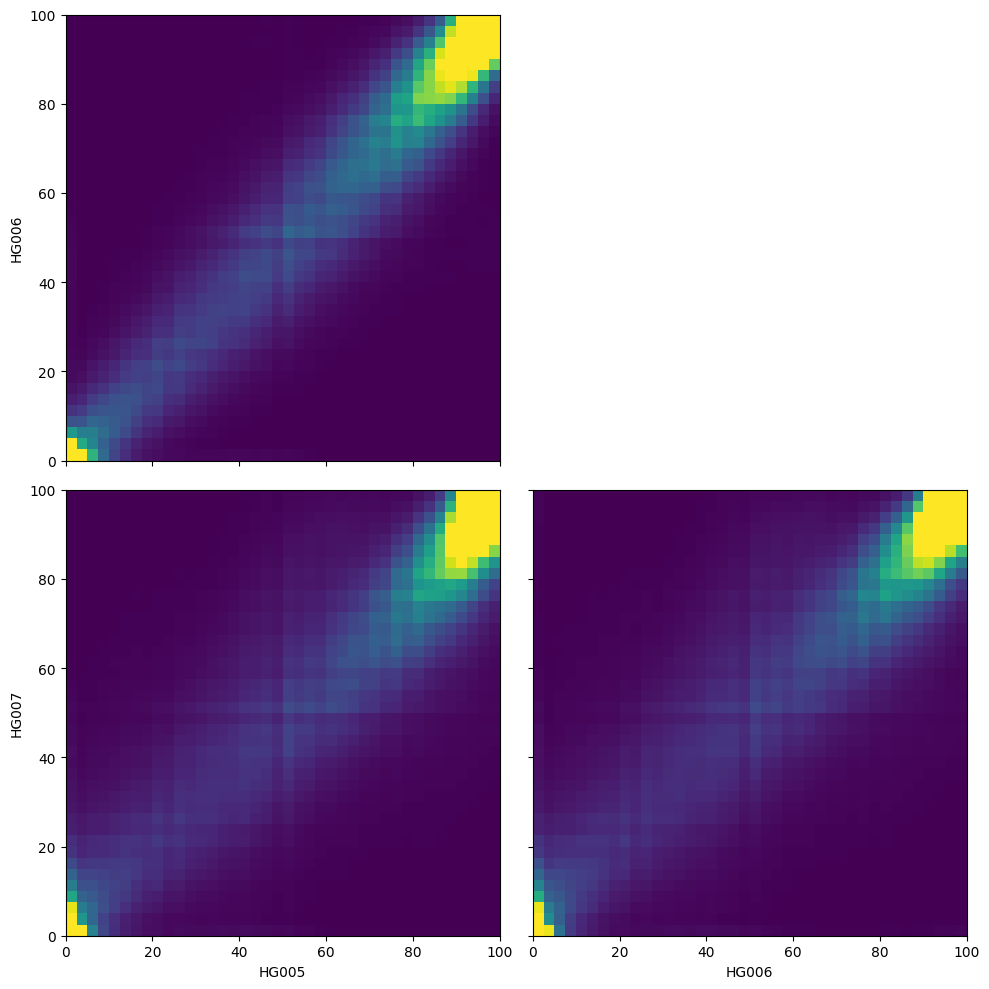

In [14]:
fig, axes = ds_trio.plot_correlation_heatmaps(
    numerator="num_modc",
    denominator="num_total_c",
    min_coverage=15,
)

### Scatter plot of methylation fraction between samples
Here we show a scatter plot of the methylation fraction across samples. Because it would represent too many points otherwise, we restrict our dataset to plot only the CpGs between the genomic positions 0 and 2,000,000 of Chromosome 2 using the following syntax: `ds_trio["chr2:0-2_000_000"]`.

Note: Each plotting function returns a `fig` and `axes` object. You can then make adjustments to the figures as you see fit. For instance, below we increase the font size and rotate the axis.

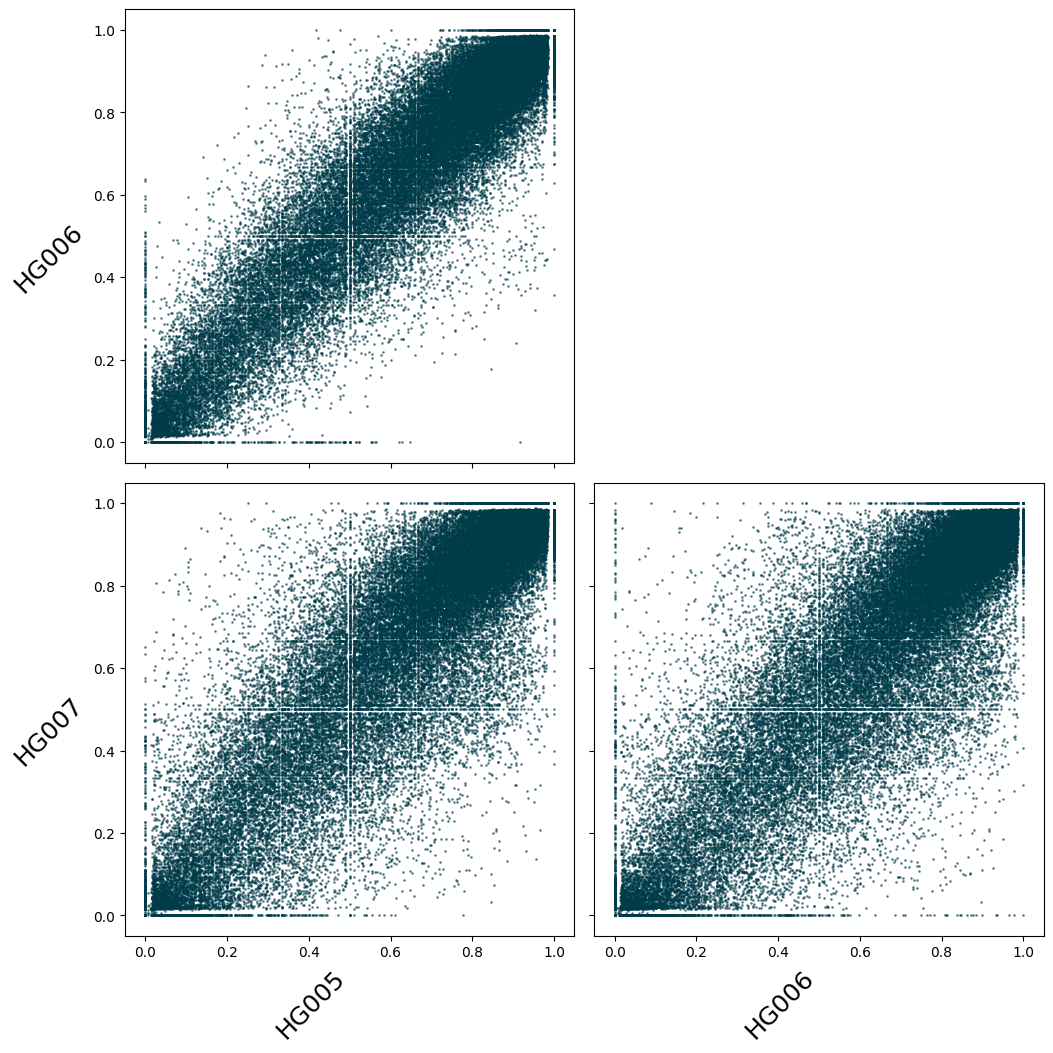

In [15]:
fig, axes = ds_trio["chr2:0-2_000_000"].plot_correlation_scatter(
    numerator="num_modc",
    denominator="num_total_c",
    min_coverage=15,
    s=1,
)
for ax in axes:
    for k in range(2):
        ax[k].set_xlabel(ax[k].get_xlabel(), fontsize=18, rotation=45, ha="right")
        ax[k].set_ylabel(ax[k].get_ylabel(), fontsize=18, rotation=45, ha="right")